In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score


In [6]:
data=pd.read_csv('train.csv')

In [7]:
data.head(5)

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
0,748.0,2.75,1.0,75.00,24,6.300,105.300,0
1,1187.0,3.43,1.0,105.00,24,13.200,142.200,0
2,730.0,3.12,1.0,71.25,0,26.625,97.875,1
3,671.0,5.63,3.0,90.00,0,9.750,99.750,0
4,329.0,2.09,1.0,45.00,12,13.200,70.200,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  float64
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 12.8 MB


In [9]:
data.shape

(209673, 8)

In [10]:
data.describe()

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
count,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000,209673.000000
mean,1173.181478,5.054431,1.292808,99.623431,13.030824,15.136829,127.791084,0.280523
std,4775.653621,125.217419,0.930754,85.602702,20.367764,12.553436,98.797374,0.449256
min,0.000000,0.020000,0.000000,0.000000,0.000000,-0.500000,0.000000,0.000000
25%,446.000000,1.950000,1.000000,52.500000,0.000000,6.000000,70.200000,0.000000
50%,707.000000,3.200000,1.000000,75.000000,9.000000,9.750000,101.700000,0.000000
75%,1098.000000,5.730000,1.000000,116.250000,20.000000,26.450000,152.250000,1.000000
max,86387.000000,57283.910000,9.000000,4466.250000,2500.000000,435.000000,4472.250000,1.000000


In [11]:
data.isnull().sum()

trip_duration         0
distance_traveled     0
num_of_passengers     0
fare                  0
tip                   0
miscellaneous_fees    0
total_fare            0
surge_applied         0
dtype: int64

In [12]:
data.columns

Index(['trip_duration', 'distance_traveled', 'num_of_passengers', 'fare',
       'tip', 'miscellaneous_fees', 'total_fare', 'surge_applied'],
      dtype='object')

In [13]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
209668    False
209669    False
209670    False
209671    False
209672    False
Length: 209673, dtype: bool

In [14]:
columns=['trip_duration','distance_traveled','num_of_passengers','fare','miscellaneous_fees','total_fare','surge_applied']
from scipy import stats
for i in columns:
    z_scores = stats.zscore(data[i])
    threshold = 3
    outliers = np.where(np.abs(z_scores) > threshold)

outliers

(array([], dtype=int64),)

In [15]:
correlation=data.corr()

In [16]:
correlation

,trip_duration,distance_traveled,num_of_passengers,fare,tip,miscellaneous_fees,total_fare,surge_applied
trip_duration,1.000000,0.005774,-0.001477,0.150331,0.029132,0.046432,0.142159,0.029961
distance_traveled,0.005774,1.000000,-0.000299,0.035934,0.013487,0.021734,0.036677,0.005567
num_of_passengers,-0.001477,-0.000299,1.000000,0.013224,0.007277,0.010044,0.014234,0.006360
fare,0.150331,0.035934,0.013224,1.000000,0.302044,0.299321,0.966748,0.146687
tip,0.029132,0.013487,0.007277,0.302044,1.000000,0.320919,0.508639,0.239334
miscellaneous_fees,0.046432,0.021734,0.010044,0.299321,0.320919,1.000000,0.452568,0.715497
total_fare,0.142159,0.036677,0.014234,0.966748,0.508639,0.452568,1.000000,0.267350
surge_applied,0.029961,0.005567,0.006360,0.146687,0.239334,0.715497,0.267350,1.000000


In [17]:
negative_correlation=correlation[['fare','total_fare']]<0

In [18]:
negative_correlation

,fare,total_fare
trip_duration,False,False
distance_traveled,False,False
num_of_passengers,False,False
fare,False,False
tip,False,False
miscellaneous_fees,False,False
total_fare,False,False
surge_applied,False,False


In [19]:
import matplotlib.pyplot as plt


In [20]:
data1=data.sample(200)

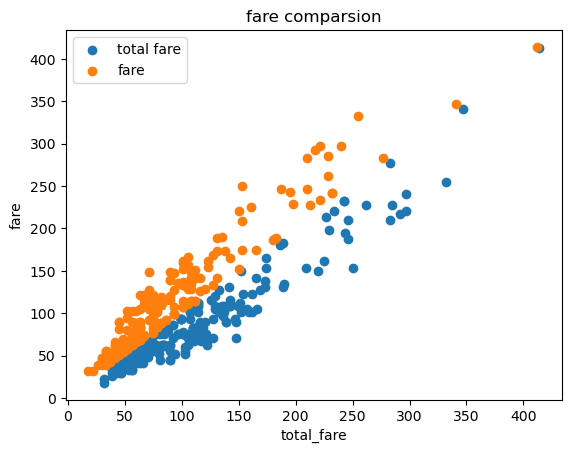

In [21]:
x=data1['total_fare'].astype(int)
y=data1['fare'].astype(int)
plt.xlabel('total_fare')
plt.ylabel('fare')
plt.title('fare comparsion')
plt.scatter(x, y,label='total fare') 
plt.scatter(y, x,label='fare')
plt.legend()




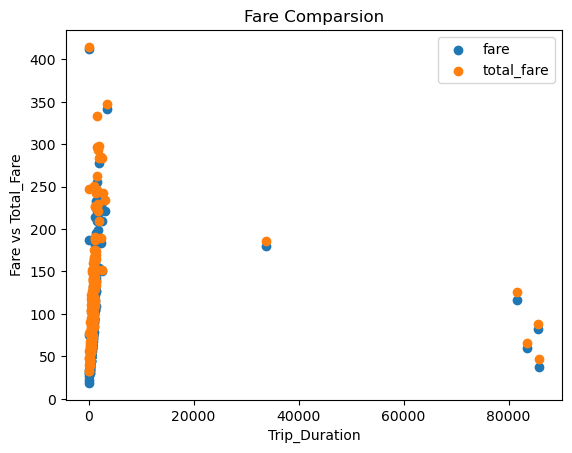

In [22]:
trip_duration=data1['trip_duration']
distance=data1['distance_traveled']
fare=data1['fare']
total_fare=data1['total_fare']

plt.xlabel('Trip_Duration')
plt.ylabel('Fare vs Total_Fare')
plt.title('Fare Comparsion')
plt.scatter(trip_duration, fare ,label='fare') 
plt.scatter(trip_duration, total_fare,label='total_fare') 
plt.legend()







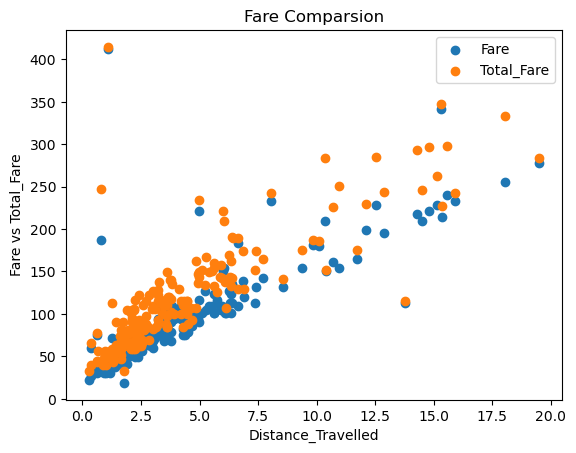

In [23]:
plt.xlabel('Distance_Travelled')
plt.ylabel('Fare vs Total_Fare')
plt.title('Fare Comparsion')
plt.scatter(distance, fare,label='Fare') 
plt.scatter(distance, total_fare,label='Total_Fare') 
plt.legend()


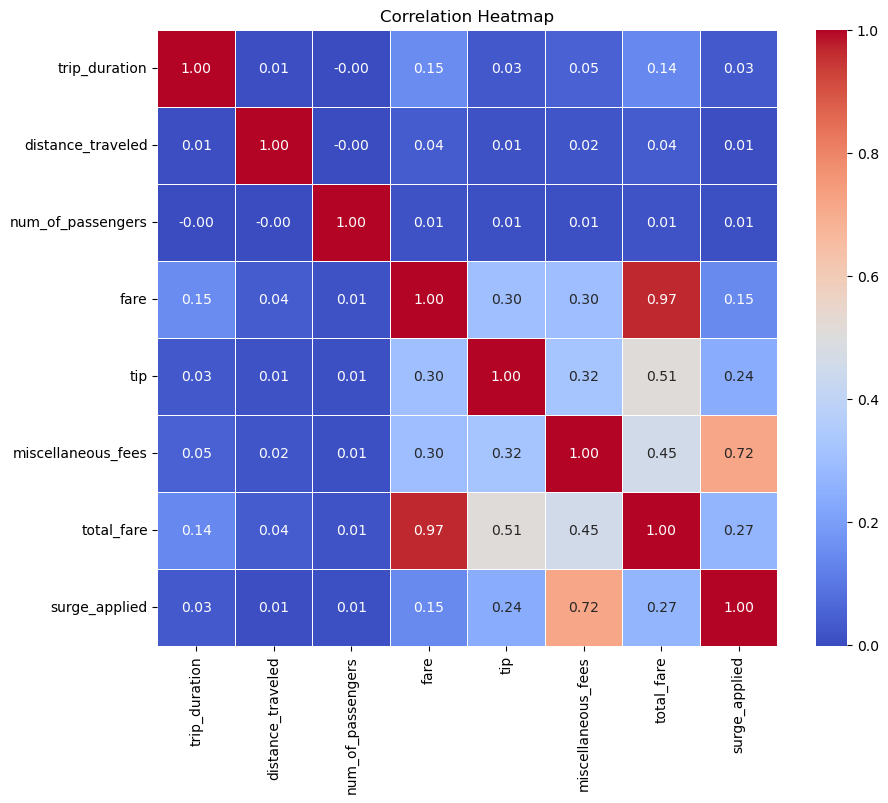

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
# Replace 'taxi_fare.csv' with the actual path to your dataset

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [25]:
import pandas as pd
from ydata_profiling import ProfileReport

# Read the CSV file into a DataFrame
df = pd.read_csv("train.csv")

# Generate the profiling report with minimal (non-interactive) analysis
profile = ProfileReport(df, title="Pandas Profiling Report", explorative=True, minimal=True)

# Save the report as an HTML file
profile.to_file("pandas_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
profile.to_notebook_iframe()

In [27]:
data['num_of_passengers']=data['num_of_passengers'].astype(int)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209673 entries, 0 to 209672
Data columns (total 8 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   trip_duration       209673 non-null  float64
 1   distance_traveled   209673 non-null  float64
 2   num_of_passengers   209673 non-null  int32  
 3   fare                209673 non-null  float64
 4   tip                 209673 non-null  int64  
 5   miscellaneous_fees  209673 non-null  float64
 6   total_fare          209673 non-null  float64
 7   surge_applied       209673 non-null  int64  
dtypes: float64(5), int32(1), int64(2)
memory usage: 12.0 MB


In [29]:
x=data.loc[:,['trip_duration','distance_traveled','num_of_passengers','tip','miscellaneous_fees','surge_applied']]

In [30]:
y=data.loc[:,['fare','total_fare']]

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=10)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler=StandardScaler()

In [35]:
x_train_scaled=scaler.fit_transform(x_train)

In [36]:
x_test_scaled=scaler.transform(x_test)

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [38]:
model=LinearRegression()
model.fit(x_train_scaled,y_train)


    

LinearRegression()

In [39]:
y_train_predict=model.predict(x_train_scaled)

In [40]:
accuracy1=r2_score(y_train,y_train_predict)*100

In [41]:
y_predict_val=model.predict(x_test_scaled)

In [42]:
accuracy1

26.929703013017797

In [43]:
model2=DecisionTreeRegressor()

In [44]:
model2.fit(x_train,y_train)

DecisionTreeRegressor()

In [45]:
y_predict2=model2.predict(x_test)

In [46]:
accuracy2=r2_score(y_test,y_predict2)*100

In [47]:
accuracy2

61.705060267874266

In [48]:
model3=RandomForestRegressor()

In [49]:
model3.fit(x_train,y_train)

RandomForestRegressor()

In [50]:
y_predict3=model3.predict(x_test)

In [51]:
accuracy3=r2_score(y_test,y_predict3)*100

In [52]:
accuracy3

83.18589474745055

In [53]:
model4=KNeighborsRegressor()

In [54]:
model4.fit(x_train,y_train)

KNeighborsRegressor()

In [55]:
y_predict4=model4.predict(x_test)

In [56]:
accuracy4=r2_score(y_test,y_predict4)*100

In [57]:
accuracy4

72.65786940764552

In [58]:
a=data['num_of_passengers'].min()

In [59]:
b=data['num_of_passengers'].max()

In [60]:
data['tip'].min()

0

In [61]:
data['tip'].max()

2500

In [62]:
data['trip_duration'].min()

0.0

In [63]:
data['trip_duration'].max()

86387.0

In [64]:
data['distance_traveled'].min()

0.02

In [65]:
data['distance_traveled'].max()

57283.91

In [68]:
import pickle
filename="chproject(1).ipynb"
pickle.dump(model3,open(filename,'wb'))
model21=pickle.load(open(filename,'rb'))
with open('model21.pkl','wb') as files:
    pickle.dump(model21,files)
with open('model21.pkl', 'rb') as model_file:
    Result = pickle.load(model_file)

In [74]:
import pickle
filename="chproject(1).ipynb"
pickle.dump(model3,open(filename,'wb'))
model21=pickle.load(open(filename,'rb'))
with open('model21.pkl','wb') as files:
    pickle.dump(model21,files)
with open('model21.pkl', 'rb') as model_file:
    Result = pickle.load(model_file)
    try:
         def make_prediction():
             is_valid = True
             if not trip_duration_input():
                 is_valid = False
             if not distance_traveled_input():
                 is_valid = False
             if not num_of_people_input():
                 is_valid = False
             if not tip_input():
                 is_valid = False
             if not miscellaneous_fees_input():
                 is_valid = False
             if not surge_applied_input():
                 is_valid = False
             if is_valid:
                 trip_duration = float(entry1.get())
                 distance_traveled = float(entry2.get())
                 num_of_people = int(entry3.get())
                 tip = float(entry4.get())
                 miscellaneous_fees = float(entry5.get())
                 surge_applied = int(entry6.get())

                 features = [[trip_duration, distance_traveled, num_of_people, tip, miscellaneous_fees, surge_applied]]
                 prediction = model21.predict(features)  

                 fare = prediction[0][0]  
                 total_fee = fare + tip + miscellaneous_fees 
                 entry7.delete('0', 'end')
                 entry7.insert(0, f"{fare:.2f}")  
                 entry8.delete('0', 'end')
                 entry8.insert(0, f"{total_fee:.2f}") 

            
    except Exception as e:
        messagebox.showerror("Prediction Error", str(e))
             
           
        
def trip_duration_input():
    input = entry1.get()
    try:
        number = float(input)
        if number < 1:
            raise ValueError("Trip duration must be greater than zero.")
        return True  # Validation passed
    except ValueError:
        messagebox.showerror("Validation Error", "Please enter a valid number for Trip Duration.")
        return False  # Validation failed

def distance_traveled_input():
    input = entry2.get()
    try:
        number = float(input)
        if number < 1:
            raise ValueError("Distance traveled must be greater than zero.")
        return True
    except ValueError:
        messagebox.showerror("Validation Error", "Please enter a valid number for Distance Traveled.")
        return False

def num_of_people_input():
    input = entry3.get()
    try:
        number = int(input)
        if number < 1 or number > 9:
            raise ValueError("Number of passengers must be between 1 and 9.")
        return True
    except ValueError:
        messagebox.showerror("Validation Error", "Please enter a valid number of passengers (0-9).")
        return False

def tip_input():
    input = entry4.get()
    try:
        number = float(input)
        if number < 0:
            raise ValueError('Tip amount must be non-negative.')
        return True
    except ValueError:
        messagebox.showerror("Validation Error", "Please enter a valid tip.")
        return False

def miscellaneous_fees_input():
    input = entry5.get()
    try:
        number = float(input)
        if number < 0:
            raise ValueError("Miscellaneous fees must be non-negative.")
        return True
    except ValueError:
        messagebox.showerror("Validation Error", "Please enter valid miscellaneous fees (>= 0).")
        return False

def surge_applied_input():
    input = entry6.get()
    try:
        number = int(input)
        if number < 0 or number > 1:
            raise ValueError("Surge applied value must be 0 or 1.")
        return True
    except ValueError:
        messagebox.showerror("Validation Error", "Please enter 0 or 1 for Surge Applied.")
        return False

def clear_entries():
    for entry in [entry1,entry2,entry3,entry4,entry5,entry6,entry7,entry8]:
        entry.delete('0', 'end')
        entry.configure(bg='lightyellow')



In [80]:
from tkinter import *
import tkinter as tk
from tkinter import ttk
from tkinter import messagebox
from PIL import ImageTk, Image

root = tk.Tk()
root.title('Taxi Fare Prediction')
root.geometry("1920x1080")

image = Image.open('WhatsApp Image 2024-10-16 at 21.27.20_fa37660e.jpg')
background = ImageTk.PhotoImage(image)
label = tk.Label(root, image=background)
label.place(x=0,y=0)



# Title label
title_label = tk.Label(root, text="Taxi Fare Prediction", font=("Times New Roman", 50, "bold"), fg="black", bg='light blue')
title_label.pack(pady=(10, 20))  # Title on top with padding

# Input frame
input_frame = tk.Frame(root)
input_frame.pack(padx=10, pady=10)

# Input fields
label1 = tk.Label(input_frame, text='Trip Duration[in min]', font=("Helvetica", 14), bg='white')
label1.grid(row=1, column=0, sticky='w', pady=(10, 5))
entry1 = tk.Entry(input_frame, bg='lightyellow', font=("Helvetica", 14))
entry1.grid(row=1, column=1, padx=(10, 0), pady=(10, 20))

label2 = tk.Label(input_frame, text='Distance Traveled[in kms]', font=("Helvetica", 14), bg='white')
label2.grid(row=2, column=0, sticky='w', pady=(10, 5))
entry2 = tk.Entry(input_frame, bg='lightyellow', font=("Helvetica", 14))
entry2.grid(row=2, column=1, padx=(10, 0), pady=(10, 20))

label3 = tk.Label(input_frame, text='Number of People [range(1-9)]', font=("Helvetica", 14), bg='white')
label3.grid(row=3, column=0, sticky='w', pady=(10, 5))
entry3 = tk.Entry(input_frame, bg='lightyellow', font=("Helvetica", 14))
entry3.grid(row=3, column=1, padx=(10, 0), pady=(10, 20))

label4 = tk.Label(input_frame, text='Tip', font=("Helvetica", 14), bg='white')
label4.grid(row=4, column=0, sticky='w', pady=(10, 5))
entry4 = tk.Entry(input_frame, bg='lightyellow', font=("Helvetica", 14))
entry4.grid(row=4, column=1, padx=(10, 0), pady=(10, 20))

label5 = tk.Label(input_frame, text='Miscellaneous Fees', font=("Helvetica", 14), bg='white')
label5.grid(row=5, column=0, sticky='w', pady=(10, 5))
entry5 = tk.Entry(input_frame, bg='lightyellow', font=("Helvetica", 14))
entry5.grid(row=5, column=1, padx=(10, 0), pady=(10, 20))

label6 = tk.Label(input_frame, text='Surge Applied [0 or 1]', font=("Helvetica", 14), bg='white')
label6.grid(row=6, column=0, sticky='w', pady=(10, 5))
entry6 = tk.Entry(input_frame, bg='lightyellow', font=("Helvetica", 14))
entry6.grid(row=6, column=1, padx=(10, 0), pady=(10, 20))

# Prediction button
submit_button = tk.Button(root, text='Predict', font=("Helvetica", 30, "bold"), bg='lightblue', fg='darkblue', command=make_prediction)
submit_button.pack(pady=(20, 20))

# Output frame
output_frame = tk.Frame(root)
output_frame.pack(padx=10, pady=10)

# Output fields
label7 = tk.Label(output_frame, text='Fare', font=("Helvetica", 14), bg='white')
label7.grid(row=0, column=0, sticky='w', pady=(10, 5))
entry7 = tk.Entry(output_frame, bg='lightyellow', font=("Helvetica", 14))
entry7.grid(row=0, column=1, padx=(10, 0), pady=(10, 20))

label8 = tk.Label(output_frame, text='Total Fare', font=("Helvetica", 14), bg='white')
label8.grid(row=1, column=0, sticky='w', pady=(10, 5))
entry8 = tk.Entry(output_frame, bg='lightyellow', font=("Helvetica", 14))
entry8.grid(row=1, column=1, padx=(10, 0), pady=(10, 20))

# Clear button
clear_button = tk.Button(root, text='Clear', font=("Helvetica", 14), bg='red', fg='white', command=clear_entries)
clear_button.pack(pady=(20, 20))

root.mainloop()
